# The XOR problem revisited with Keras
In the last session you solved the XOR problem by hand. This session you will work on a modified XOR problem and solve it with Keras.

Let's load Keras first, as well as some helper functions:

In [1]:
library(keras)
source("02-helpers.R")

Let's load the data set:

In [2]:
data <- dataset_extended_xor()

## Exercise 1
Extract the input matrix `X` and the labels `y` from the `data` object and assign them to the variables `X` and `y`.
Plot the data set using the `plot_dataset` function, by providing it with the `X` and `y` variables.

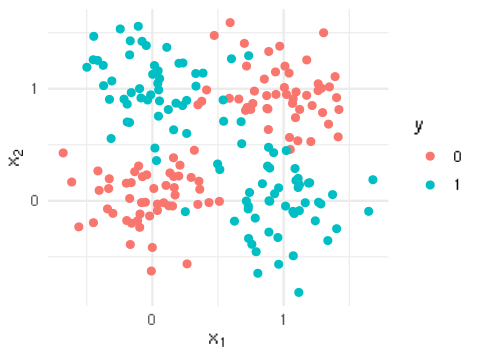

In [3]:
X <- data$X
y <- data$y
plot_dataset(X, y)

Let's build a simple Keras model with one hidden layer of four neurons and a ReLU activation function, and an output layer with one neuron with sigmoid activation. Running the following cell will show a summary of the model with the different layers.

**Note**: the `%>%` operator will apply the output of the left-hand side as the **first parameter** of the function on the right-hand side.

In [4]:
model <- keras_model_sequential() %>%
    # The input_shape parameter in the line below refers to the number of input features (x1 and x2)
    layer_dense(units = 4, input_shape = 2, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

model  # this will show a summary of the model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 4)                       12          
________________________________________________________________________________
dense_1 (Dense)                     (None, 1)                       5           
Total params: 17
Trainable params: 17
Non-trainable params: 0
________________________________________________________________________________



`keras_model_sequential` allows you to build a linear stack of layers. We add two dense layers to the initial model. For more information on the sequential model, see the [Keras documentation](https://keras.rstudio.com/reference/keras_model_sequential.html).

The output shape of each layer always has the batch size of the layer as its first dimension. Because the batch size is not known, this first dimension is reported as `None`.

## Exercise 2
Why do we have an output shape of `(None, 4)` in the first layer, and `(None, 1)` in the second? Motivate your answer in the cell below as a comment:

In [5]:
# None is the batch size. 4 is the number of neurons in the hidden layer, and we have 1 neuron in the output layer.

## Exercise 3
Why do we have 12 parameters in the hidden layer, and 5 in the output layer? Motivate your answer in the cell below as a comment.

**Hint**: it may help to draw the neurons and weights on a piece of paper.

In [6]:
# Hidden layer (12 parameters): 4 neurons, each with 2 inputs and one bias = (2 weight + 1 bias parameters) x 4
# Output layer (5 parameters): 1 neuron with 4 inputs and one bias = 4 weight + 1 bias parameters

We need to **compile** the model before training it to configure the learning process. We do that by specifying three parameters:
1. The optimizer - Adam, with learning rate 0.01
1. A loss function - binary cross-entropy (more on this later), since this is a two-class problem
1. A metric - accuracy, since this is a classification problem

In [7]:
model %>% compile(
    optimizer = optimizer_adam(lr = 0.01),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)
model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 4)                       12          
________________________________________________________________________________
dense_1 (Dense)                     (None, 1)                       5           
Total params: 17
Trainable params: 17
Non-trainable params: 0
________________________________________________________________________________



We can now train the model by using the [`fit`](https://keras.rstudio.com/reference/fit.html) function. We feed it:
1. The input data `X`
1. The labels `y`
1. The number of epochs
1. The batch size
1. A list of callbacks. We have created a single callback for you that provides some information on the training progress.

More information, such as the loss and accuracy for each epoch, is stored in the `history` object:

In [8]:
history <- model %>% fit(
    x = X,
    y = as.numeric(y) - 1, # the labels are factors, and need to be converted to an ordinary vector of zeroes and ones
    epochs = 100,
    batch_size = 128,
    callbacks=list(Progress$new())
)

Let's plot the history of the training process:

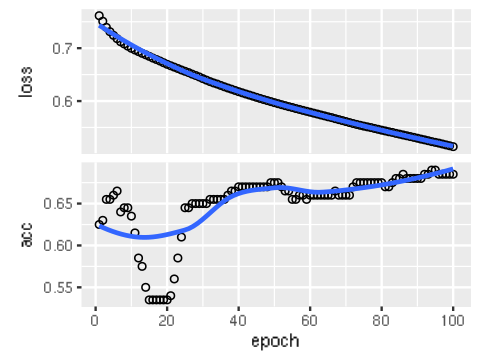

In [9]:
plot(history)

You will see the loss decrease during training, and converge after 30 or 40 epochs. The accuracy will increase, though not necessarily in proportion to the decrease in loss.

Let's plot the predictions that this model makes on the XOR data set with the `plot_predictions_keras` function we have made for you:

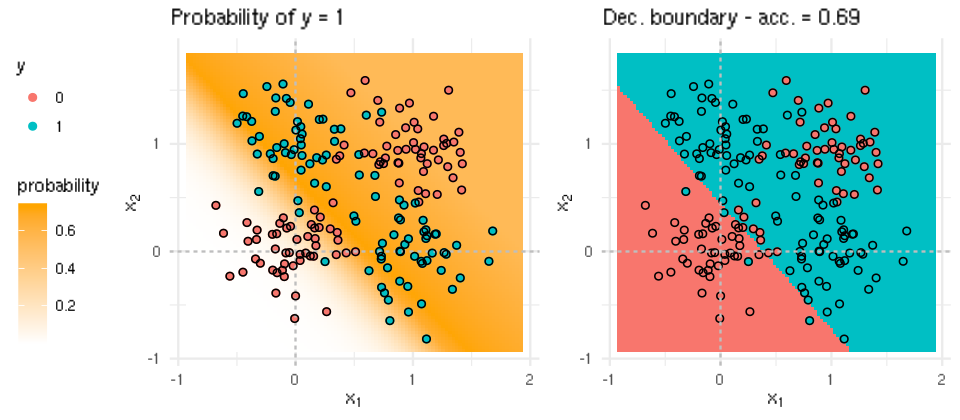

In [10]:
plot_predictions_keras(X, y, model)

The model will do reasonably well to very well, depending on how 'lucky' you were during training. The decision boundary will follow the contours of the distribution, but also miss some outliers.

Because there is a large degree of randomness involved in training a deep learning model, the performance of the model may vary considerably. This is exacerbated by the fact that we have a small data set, and a relatively large learning rate. Accuracy at epoch 100 varied between 0.7 and 0.95 in our test runs, so your mileage may vary.

## Exercise 4
The goal of this exercise is to get the accuracy higher than 0.95. To do so, vary the following parameters:

1. The number of units in the hidden layer (you can try dozens, thousands, etc.)
1. The learning rate. Increase or decrease it by factors of 10 (e.g. 0.01, 0.001, 0.1, etc.)
1. The number of epochs

We have provided you with a skeleton that you can fill out below:

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_2 (Dense)                     (None, 2048)                    6144        
________________________________________________________________________________
dense_3 (Dense)                     (None, 1)                       2049        
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
________________________________________________________________________________


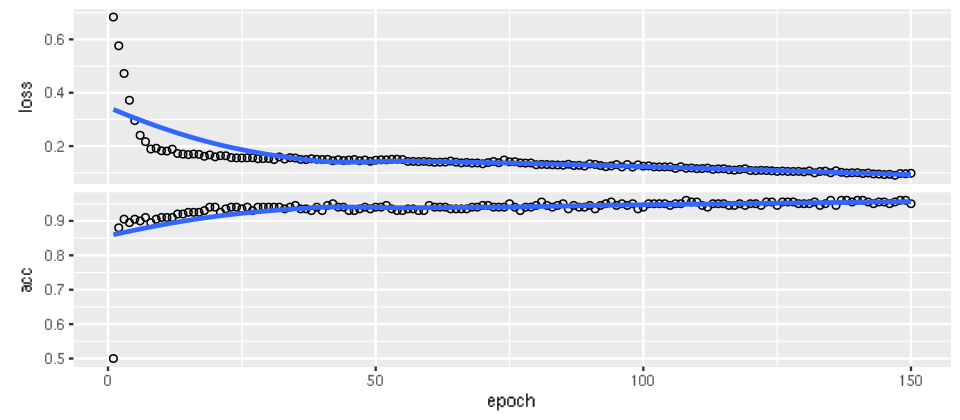

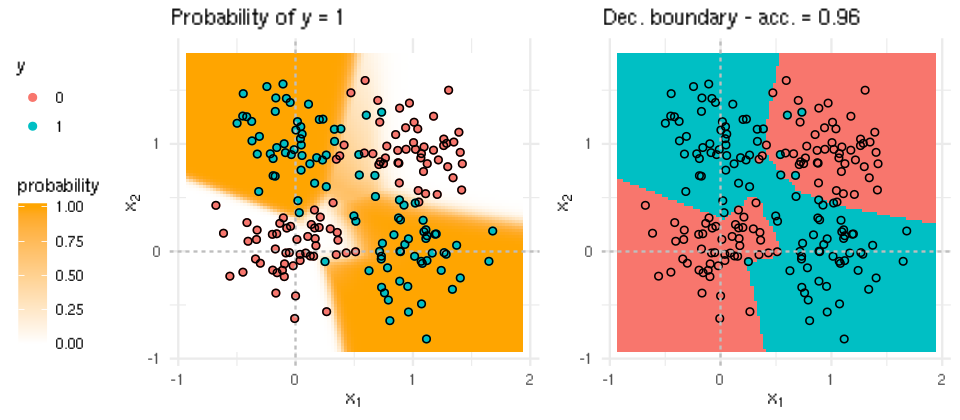

In [11]:
# Answer:
# We have created a model of 2048 units in the hidden layer, and increased the number of epochs. Your model can look
# different.

model <- keras_model_sequential() %>%
    layer_dense(units = 2048, input_shape = 2, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.01),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = X,
    y = as.numeric(y) - 1, # the labels are factors, and need to be converted to an ordinary vector of zeroes and ones
    epochs = 150,
    batch_size = 128,
    callbacks=list(Progress$new())
)
plot(history)
plot_predictions_keras(X, y, model)

## Exercise 5
Slowly increase the capacity of your model by adding more neurons and hidden layers. You can also modify the number of epochs and the learning rate. Copy-paste your code from exercise 4, and adapt it in the following cell.

Try to classify the data set (almost) perfectly. That is: accuracy equal to or very close to 1.

**Hints**:
1. Be careful adding too many layers, as the number of trainable parameters and the training time increase very quickly
1. You may need to modify the learning rate when adding more layers
1. As in exercise 4, increasing the number of epochs may help to increase accuracy

Model: "sequential_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_4 (Dense)                     (None, 1024)                    3072        
________________________________________________________________________________
dense_5 (Dense)                     (None, 1024)                    1049600     
________________________________________________________________________________
dense_6 (Dense)                     (None, 512)                     524800      
________________________________________________________________________________
dense_7 (Dense)                     (None, 1)                       513         
Total params: 1,577,985
Trainable params: 1,577,985
Non-trainable params: 0
________________________________________________________________________________


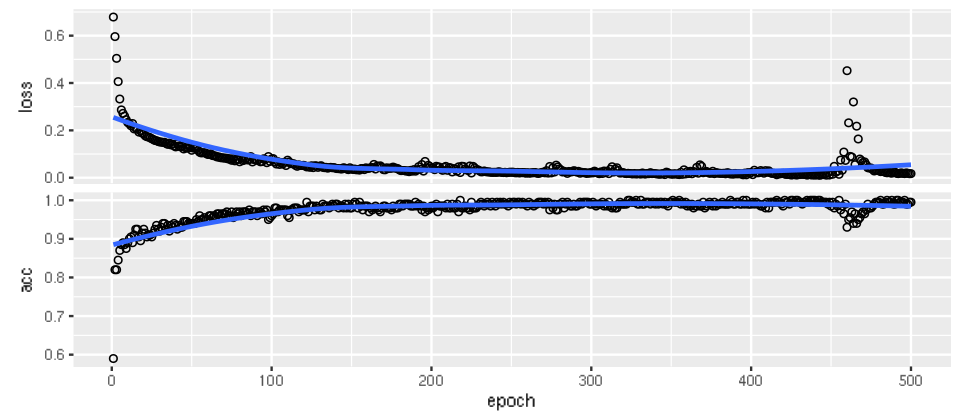

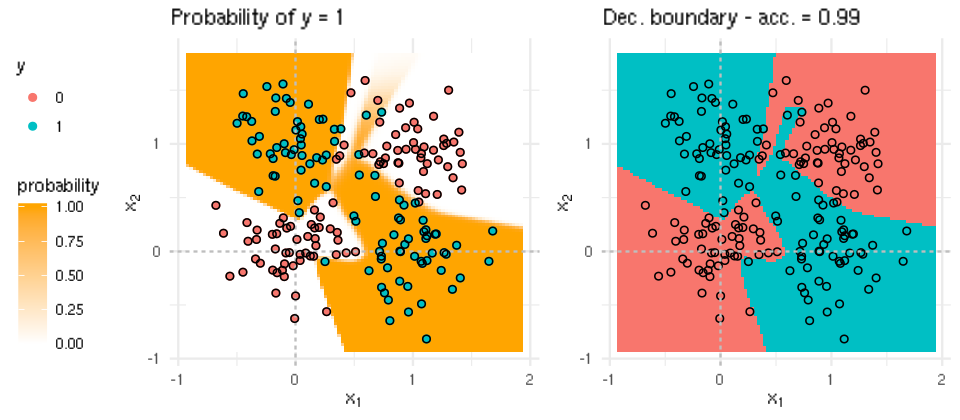

In [12]:
# Answer:
# Your model may look different, as there is not a single, optimal model for this problem. We have increased
# the number of epochs significantly and reduced the learning rate.

model <- keras_model_sequential() %>%
    layer_dense(units = 1024, input_shape = 2, activation = "relu") %>%
    layer_dense(units = 1024, activation = "relu") %>%
    layer_dense(units = 512, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = X,
    y = as.numeric(y) - 1, # the labels are factors, and need to be converted to an ordinary vector of zeroes and ones
    epochs = 500,
    batch_size = 128,
    callbacks=list(Progress$new())
)
plot(history)
plot_predictions_keras(X, y, model)

## Exercise 6
Do you think this is a reasonable model? Why? Motivate your answer in the cell below as a comment.

**Hint**: do you think this model will generalise well to more samples drawn from the same distribution?

In [13]:
# If the data set fits perfectly, your decision boundary will not be smooth, but have small islands and protrusions
# to fit perfectly to outliers. These will be specific to your current data set, but not to a similar data set taken 
# from the same distribution. The network has become overly specific to this particular dataset (it has memorised it
# perfectly), and will have reduced accuracy on a slightly different one.

## Exercise 7: bonus
We have prepared another artificial data set for you, looking like a noisy checkerboard. It is slightly more complicated than the modified XOR problem of the previous exercises.

Try to solve the problem in a way that generalises well. That is: when presented with new samples from the same problem, the accuracy of the model will be comparable. Validate your trained model with the dataset returned by the function `dataset_checkerboard_validation`. You can use `plot_predictions_keras` to plot the decision boundary and get a performance estimate for this validation set.

**Hint**: you can try increasing the batch size to speed up the training process.

In [14]:
data <- dataset_checkerboard()

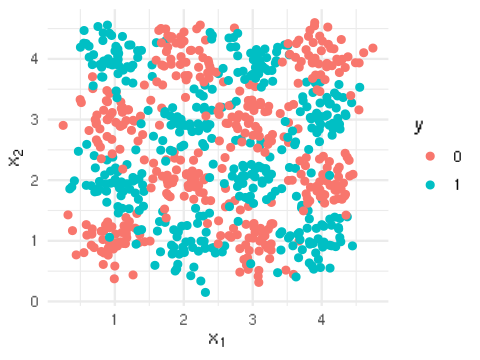

In [15]:
X <- data$X
y <- data$y
plot_dataset(X, y)

Model: "sequential_3"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_8 (Dense)                     (None, 128)                     384         
________________________________________________________________________________
dense_9 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dense_10 (Dense)                    (None, 1)                       65          
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
________________________________________________________________________________


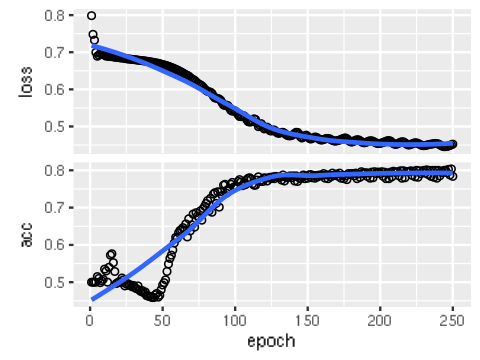

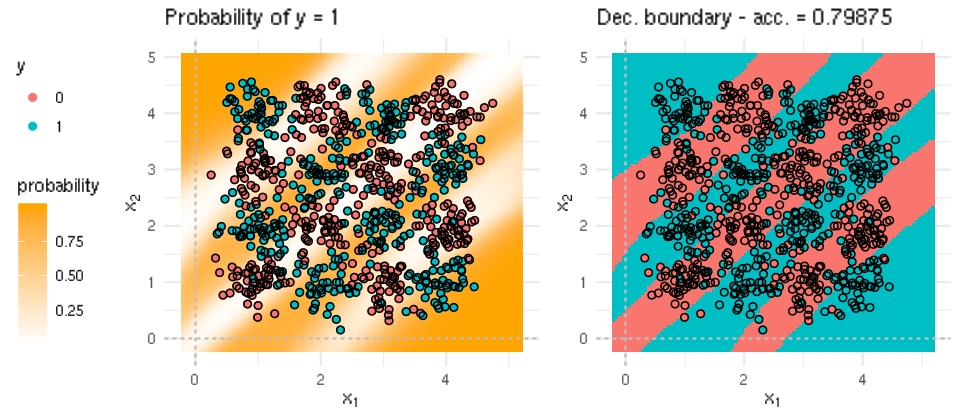

In [16]:
# Answer:
# This problem is a bit harder, since you need to look at the decision boundary and guess if it would generalise well
# to similar samples from the same distribution. The model below creates banded decision boundaries that generalise
# quite well and yield similar accuracies on the training and validation sets. Your model may be different.

model <- keras_model_sequential() %>%
    layer_dense(units = 128, input_shape = 2, activation = "relu") %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.01),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = X,
    y = as.numeric(y) - 1, # the labels are factors, and need to be converted to an ordinary vector of zeroes and ones
    epochs = 250,
    batch_size = 1024,
    shuffle = TRUE,
    callbacks=list(Progress$new())
)
plot(history)
plot_predictions_keras(X, y, model)

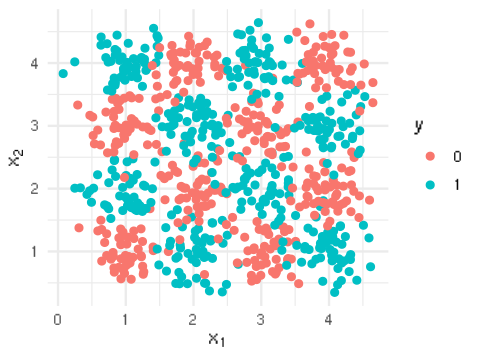

In [17]:
data_val <- dataset_checkerboard_validation()
X_val <- data_val$X
y_val <- data_val$y

plot_dataset(X_val, y_val)

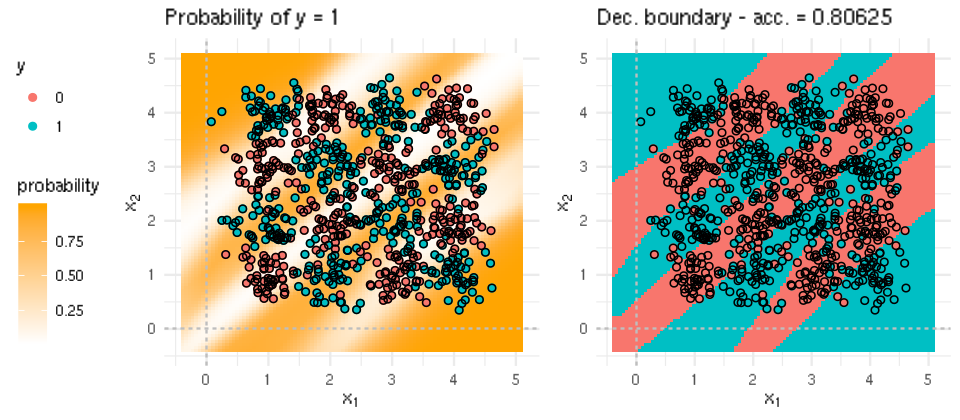

In [18]:
plot_predictions_keras(X_val, y_val, model)